# Required Imports

**Imports:**
* numpy
* Matplotlib - for visualization 
* Keras - Building and Training CNN

In [1]:
import numpy as np

import matplotlib.pyplot as plt 

from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist, cifar10

%matplotlib inline

Using TensorFlow backend.


# Import dataset and Nomalization

In [2]:
(train, _), (test, _) = mnist.load_data()

# scaling input data
train = train.reshape([-1,28,28,1]) / 255
test = test.reshape([-1,28,28,1]) / 255

11493376/11490434 [==============================] - 0s 0us/step


Construct noisy data

In [3]:
# Adding noise to data
noise = 0.3
train_noise = train + noise * np.random.normal(0, 1, size=train.shape)
test_noise = test + noise * np.random.normal(0, 1, size=test.shape)

train_noise = np.clip(train_noise, 0, 1)
test_noise = np.clip(test_noise, 0, 1)

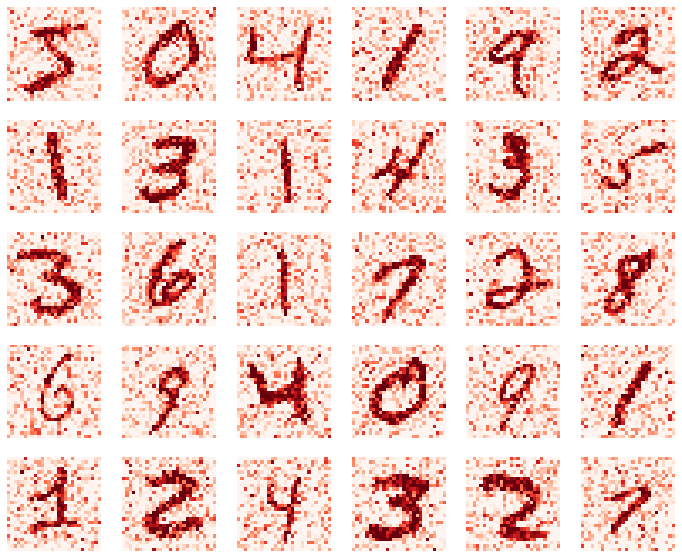

In [4]:
# sample noisy image

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2

f = plt.figure(figsize=(subplot_size*cols,subplot_size*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_noise[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_noise.png")

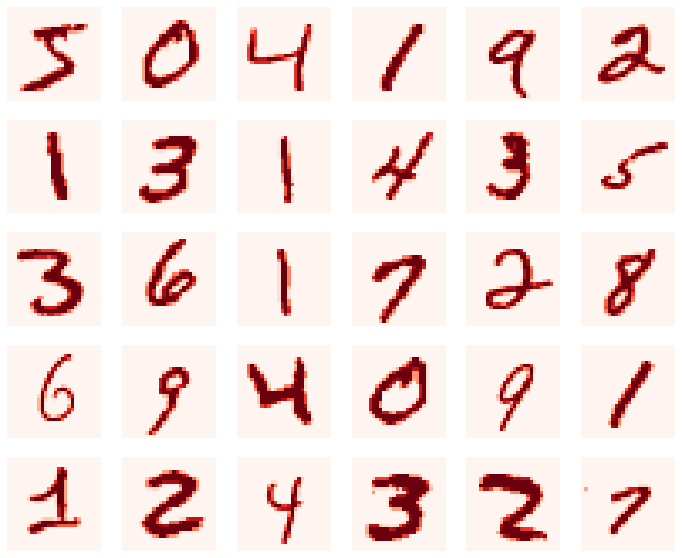

In [5]:


rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_original.png")

# Define my model

In [6]:

inputs = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPool2D()(x)


In [7]:
x = Conv2D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248  

# Training

In [9]:
epochs = 50
batch_size = 256

history = autoencoder.fit(train_noise,
                train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_noise, test)
               )

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1847 - val_loss: 0.1107
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1120 - val_loss: 0.0947
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1027 - val_loss: 0.0967
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0982 - val_loss: 0.0893
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0954 - val_loss: 0.0887
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0935 - val_loss: 0.0856
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0920 - val_loss: 0.0837
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0909 - val_loss: 0.0863
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0901 - val_loss: 0.0825
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0894 - val_loss: 0.082

# Performance/ Visualise Results

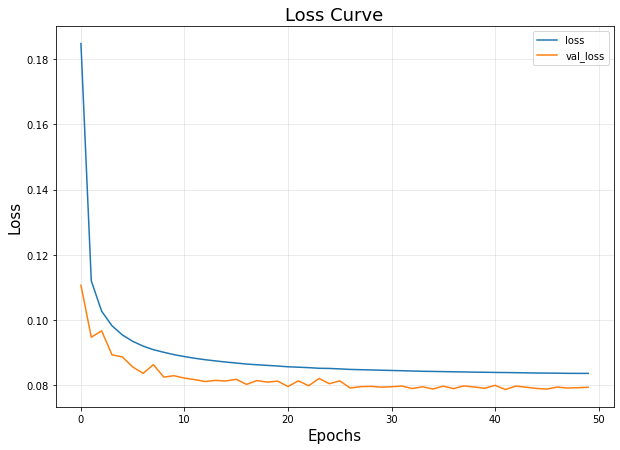

In [10]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

### Sample few test images

In [11]:
# Select few random test images
num_imgs = 16
rand = np.random.randint(1, 100)

test_images = test_noise[rand:rand+num_imgs] # slicing
test_desoided = autoencoder.predict(test_images) # predict

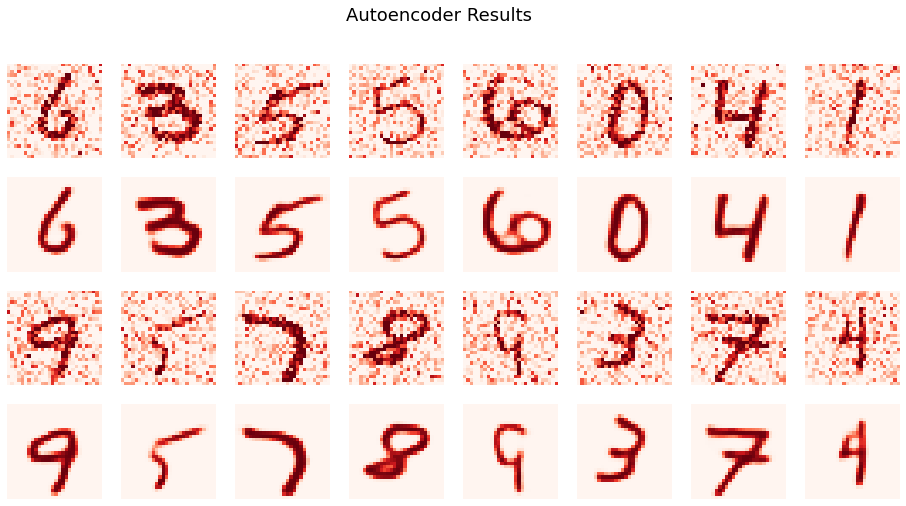

In [12]:
# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_images[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_desoided[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")

plt.show()